In [1]:
#import libraries 

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import time

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.preprocessing import MinMaxScaler

In [2]:
# To ingnor/ hide the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import libraries to plot graphs

from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio

In [4]:
#Read Csvfile 

dtframe=pd.read_csv("Connected_Vehicles_UWE_Dataset.csv")

#Print the head of dataframe
dtframe.head(5)

,VEHICLE IDENTIFICATION OTONOMO ID,FUELTYPE,LOCATION LAT START,LOCATION LAT END,LOCATION LONG START,LOCATION LONG END,MOBILITY SPEED AVERAGE,MOBILITY SPEEDMAXIMUM,TRIP START,TRIP END,TRIP LENGTH MINUTES
0,003217527c9a5ad89e8bb00374ee9d37,ICE,54.95903,54.95903,-1.74675,-1.74670,12.353081,32.870536,1/1/2022 5:52,1/1/2022 6:02,10
1,003217527c9a5ad89e8bb00374ee9d37,ICE,54.95903,54.95904,-1.74670,-1.74668,12.783539,32.789758,1/2/2022 5:45,1/2/2022 5:54,9
2,003217527c9a5ad89e8bb00374ee9d37,ICE,54.95904,54.95905,-1.74668,-1.74668,9.964760,30.565249,1/3/2022 5:37,1/3/2022 5:46,9
3,003217527c9a5ad89e8bb00374ee9d37,ICE,54.95905,54.95900,-1.74668,-1.74672,6.608753,28.483655,1/3/2022 12:27,1/3/2022 12:44,17
4,003217527c9a5ad89e8bb00374ee9d37,ICE,54.95900,54.95893,-1.74672,-1.74670,28.475833,57.576255,1/3/2022 13:25,1/3/2022 13:53,28


In [5]:
#Print shape
dtframe.shape

(191978, 11)

In [6]:
#View Index, Datatype and Memory usage to understand the atrributes
dtframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191978 entries, 0 to 191977
Data columns (total 11 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   VEHICLE IDENTIFICATION OTONOMO ID  191978 non-null  object 
 1   FUELTYPE                           191978 non-null  object 
 2   LOCATION LAT START                 191978 non-null  float64
 3   LOCATION LAT END                   191978 non-null  float64
 4   LOCATION LONG START                191978 non-null  float64
 5   LOCATION LONG END                  191978 non-null  float64
 6   MOBILITY SPEED AVERAGE             191950 non-null  float64
 7   MOBILITY SPEEDMAXIMUM              191950 non-null  float64
 8   TRIP START                         191978 non-null  object 
 9   TRIP END                           191978 non-null  object 
 10  TRIP LENGTH MINUTES                191978 non-null  int64  
dtypes: float64(6), int64(1), object(4)
memo

In [7]:
# Check NUll values
pd.isnull(dtframe)

,VEHICLE IDENTIFICATION OTONOMO ID,FUELTYPE,LOCATION LAT START,LOCATION LAT END,LOCATION LONG START,LOCATION LONG END,MOBILITY SPEED AVERAGE,MOBILITY SPEEDMAXIMUM,TRIP START,TRIP END,TRIP LENGTH MINUTES
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
191973,False,False,False,False,False,False,False,False,False,False,False
191974,False,False,False,False,False,False,False,False,False,False,False
191975,False,False,False,False,False,False,False,False,False,False,False
191976,False,False,False,False,False,False,False,False,False,False,False


In [8]:
# Describe data set to get Mean, Count, standar deviation, minimum maximum values 
dtframe.describe()

,LOCATION LAT START,LOCATION LAT END,LOCATION LONG START,LOCATION LONG END,MOBILITY SPEED AVERAGE,MOBILITY SPEEDMAXIMUM,TRIP LENGTH MINUTES
count,191978.000000,191978.000000,191978.000000,191978.000000,191950.000000,191950.000000,191978.000000
mean,54.718290,54.718208,-0.433399,-0.433438,13.388854,37.852868,19.641568
std,1.520294,1.520076,1.832632,1.832394,8.506058,16.365480,20.932548
min,40.458670,40.459180,-7.532440,-7.532380,0.000000,0.000000,1.000000
25%,53.365576,53.365077,-1.366746,-1.366318,7.163291,27.296836,7.000000
50%,54.775108,54.775795,-0.245261,-0.245254,11.892837,34.591734,14.000000
75%,55.478118,55.478107,0.636191,0.635882,17.668630,47.621888,25.000000
max,62.028830,62.060374,11.106298,11.108297,71.708474,113.213831,605.000000


In [9]:
# total number of not null rows 
pd.notnull(dtframe)

,VEHICLE IDENTIFICATION OTONOMO ID,FUELTYPE,LOCATION LAT START,LOCATION LAT END,LOCATION LONG START,LOCATION LONG END,MOBILITY SPEED AVERAGE,MOBILITY SPEEDMAXIMUM,TRIP START,TRIP END,TRIP LENGTH MINUTES
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
191973,True,True,True,True,True,True,True,True,True,True,True
191974,True,True,True,True,True,True,True,True,True,True,True
191975,True,True,True,True,True,True,True,True,True,True,True
191976,True,True,True,True,True,True,True,True,True,True,True


In [10]:
#Backup Data Set
bkpdtframe=dtframe

#Reomve all rows missing values
dtframe = dtframe.dropna()
dtframe.shape

(191950, 11)

In [11]:
# Unique fuletypes 
dtframe['FUELTYPE'].unique()

array(['ICE', 'EV', 'Hybrid ', 'Unknown'], dtype=object)

In [12]:
# Import label encoder 

from sklearn import preprocessing


# label_encoder object knows how to understand word labels. 

label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'FUELTYPE'.  
dtframe["FUELTYPE"]= label_encoder.fit_transform(dtframe["FUELTYPE"]) 


In [13]:
# Fuletype atrribute after label encoder
dtframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191950 entries, 0 to 191977
Data columns (total 11 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   VEHICLE IDENTIFICATION OTONOMO ID  191950 non-null  object 
 1   FUELTYPE                           191950 non-null  int32  
 2   LOCATION LAT START                 191950 non-null  float64
 3   LOCATION LAT END                   191950 non-null  float64
 4   LOCATION LONG START                191950 non-null  float64
 5   LOCATION LONG END                  191950 non-null  float64
 6   MOBILITY SPEED AVERAGE             191950 non-null  float64
 7   MOBILITY SPEEDMAXIMUM              191950 non-null  float64
 8   TRIP START                         191950 non-null  object 
 9   TRIP END                           191950 non-null  object 
 10  TRIP LENGTH MINUTES                191950 non-null  int64  
dtypes: float64(6), int32(1), int64(1), obje

In [14]:
dtframe.describe()

,FUELTYPE,LOCATION LAT START,LOCATION LAT END,LOCATION LONG START,LOCATION LONG END,MOBILITY SPEED AVERAGE,MOBILITY SPEEDMAXIMUM,TRIP LENGTH MINUTES
count,191950.000000,191950.000000,191950.000000,191950.000000,191950.000000,191950.000000,191950.000000,191950.000000
mean,0.963798,54.718290,54.718207,-0.433391,-0.433430,13.388854,37.852868,19.641615
std,1.014997,1.520322,1.520103,1.832660,1.832422,8.506058,16.365480,20.930925
min,0.000000,40.458670,40.459180,-7.532440,-7.532380,0.000000,0.000000,1.000000
25%,0.000000,53.365547,53.365020,-1.366746,-1.366318,7.163291,27.296836,7.000000
50%,0.000000,54.775075,54.775790,-0.245253,-0.245251,11.892837,34.591734,14.000000
75%,2.000000,55.478126,55.478124,0.635945,0.635880,17.668630,47.621888,25.000000
max,3.000000,62.028830,62.060374,11.106298,11.108297,71.708474,113.213831,605.000000


In [15]:
# Get the encoded labels for the Fuel Types
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = pd.DataFrame({'index':[0,1,2,3],
        'FUELTYPE':['ICE','EV','Hybrid ','Unknown']})
data['FUELTYPE_Encoded'] = le.fit_transform(data['FUELTYPE'].values)
data = data.drop_duplicates('FUELTYPE').set_index('index')
print(data)

      FUELTYPE  FUELTYPE_Encoded
index                           
0          ICE                 2
1           EV                 0
2      Hybrid                  1
3      Unknown                 3


In [16]:
import scipy.stats as stats

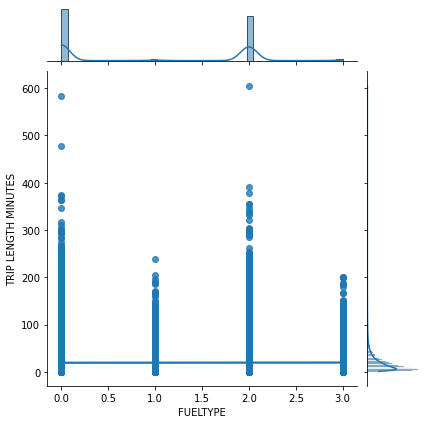

In [17]:

#  join plot to understand relation between trip lenght and fueltype
sns.jointplot(x="FUELTYPE", y="TRIP LENGTH MINUTES", data=dtframe, kind='reg');
# 


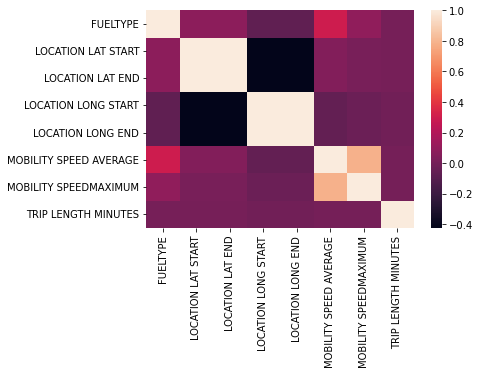

In [18]:
dataplot=sns.heatmap(dtframe.corr())
plt.show()

Interpretation of the Heatmap

- A Heatmap is shows us the relationship between the attribute or variables across to axis represented by a grid of colored squares.
- Each color in the Heatmap explains the types of the value of correlation.
- The intensity and the streanght of correlation is shown by the darker shades of the color and the lower values are used with ligher shade while zero remains transparent
- The legend depicts the range of the correlation values between the variables
-Ref: Medium. 2022. Better Heatmaps and Correlation Matrix Plots in Python. [online] Available at: <https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec> [Accessed 5 May 2022].
 
- In this particular case of correlation between FUELTYPE and MOBILITY SPEED AVERAGE is depicted by darker coral color square in grid. Which is seen in the legend between 0.25 and 0.40.

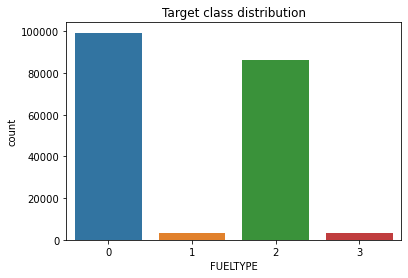

In [19]:
ax = plt.axes()
sns.countplot(x='FUELTYPE', data=dtframe, ax=ax);
ax.set_title('Target class distribution')
plt.show()

Explanation of the Countplot:
- The above count plot shows targetclass distribution among all Fuel type vehicals means it has more EV vehicals and ICE are following to it.  

In [20]:
#Splitting Data into Test and Train Sets


cols = [col for col in dtframe.columns if col not in ['FUELTYPE']]
#X is data except the target variable
X_Complete_data = dtframe[cols]
# Create the target vector
y_Complete_data = dtframe['FUELTYPE']

In [21]:
Test_data = dtframe[dtframe['FUELTYPE']==-1]
Test_data.head(5)

,VEHICLE IDENTIFICATION OTONOMO ID,FUELTYPE,LOCATION LAT START,LOCATION LAT END,LOCATION LONG START,LOCATION LONG END,MOBILITY SPEED AVERAGE,MOBILITY SPEEDMAXIMUM,TRIP START,TRIP END,TRIP LENGTH MINUTES


In [22]:
cols = [col for col in Test_data.columns if col not in ['FUELTYPE']]
#X is data except the target variable
X_Test_data = Test_data[cols]
# Create the target vector
y_Test_data = Test_data['FUELTYPE']
y_Test_data[:]= 0
y_Test_data.shape

(0,)

In [23]:
# Lable endocder to VEHICLE IDENTIFICATION OTONOMO ID 
dtframe.drop('TRIP START',axis =1,inplace=True)
dtframe.drop('TRIP END',axis =1,inplace=True)
dtframe["VEHICLE IDENTIFICATION OTONOMO ID"]= label_encoder.fit_transform(dtframe["VEHICLE IDENTIFICATION OTONOMO ID"])

In [24]:
dtframe = dtframe.dropna(axis=0, subset=['FUELTYPE'])
dtframe=dtframe[dtframe.FUELTYPE != -1]
dtframe['FUELTYPE'].head(5)

0    2
1    2
2    2
3    2
4    2
Name: FUELTYPE, dtype: int32

In [25]:
cols = [col for col in dtframe.columns if col not in ['FUELTYPE']]
#X is data except the target variable
X = dtframe[cols]
# Create the target vector
y = dtframe['FUELTYPE']
#Split Train and Test
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
 y,
test_size=0.1,
random_state=1)
X_train.head(5)

,VEHICLE IDENTIFICATION OTONOMO ID,LOCATION LAT START,LOCATION LAT END,LOCATION LONG START,LOCATION LONG END,MOBILITY SPEED AVERAGE,MOBILITY SPEEDMAXIMUM,TRIP LENGTH MINUTES
27610,331,53.089030,53.095790,0.922160,0.966210,21.890303,44.365903,6
137787,1619,57.206260,57.206170,-2.618800,-2.618930,10.861297,59.496292,2
71488,838,52.431373,52.448870,-0.074673,-0.147269,5.627950,26.389635,33
105114,1229,54.110812,54.092740,0.984164,1.013864,13.914443,33.976577,16
71506,838,52.434250,52.428912,-0.209516,-0.221749,2.879873,26.271574,21


In [26]:
y_test.head(5)

12037     0
139729    2
107320    2
117517    2
40878     2
Name: FUELTYPE, dtype: int32

In [29]:
#MLP Classifer from Artificial Neural Network
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
model1=clf.fit(X_train, y_train)
x1_predict = model1.predict(X_test)
print(x1_predict)
from sklearn.metrics import confusion_matrix
a=confusion_matrix(y_test,x1_predict)
# print("CONFUSION MATRIX for Nueral Network\n")
# print(a)

[0 0 2 ... 2 2 0]


In [30]:
precision=a[0][0]/(a[0][0]+a[1][0])
recall=a[0][0]/(a[0][0]+a[0][1])
accuracy=(a[0][0]+a[1][1])/(a[0][0]+a[0][1]+a[1][0]+a[1][1])
print("NEURAL NETWORKS:\n")
print("\nPrecision: "+str(precision))
print("\nrecall: "+str(recall))
print("\nAccuracy: "+str(accuracy))

NEURAL NETWORKS:


Precision: 0.9762682069311903

recall: 0.9988437821171634

Accuracy: 0.9753117206982543


In [31]:
# Import realtime test data
X_Test_data =pd.read_csv("Connected_Vehicles_UWE_Dataset_TEST.csv" ,error_bad_lines=False, index_col=False, dtype='unicode')

# Remove null values
X_Test_data =X_Test_data.dropna()

# Since we want to focus on which ICE user have similar behaviour like EV, 
# removed EV user and test model on ICE, Hybrid and Unknown fueltypes

X_Test_data=X_Test_data[(X_Test_data.FUELTYPE!='EV')]
 
print(X_Test_data['FUELTYPE'].value_counts())

print(X_Test_data.count(axis=1))


ICE        117161
Hybrid       3551
Unknown      2421
Name: FUELTYPE, dtype: int64
0         11
1         11
2         11
3         11
4         11
          ..
233933    11
233934    11
233935    11
233936    11
233937    11
Length: 123133, dtype: int64


In [32]:
# Percentage ratio of Fuel types present in test dataset 
X_Test_data['FUELTYPE'].value_counts(normalize=True)*100

ICE        95.149960
Hybrid      2.883874
Unknown     1.966167
Name: FUELTYPE, dtype: float64

In [33]:
#Drop Fueltype attribute from test dataset and let the model predict fuel type
X_Test_data.drop('FUELTYPE',axis =1,inplace=True)

# Lable endocder to VEHICLE IDENTIFICATION OTONOMO ID

X_Test_data["VEHICLE_IDENTIFICATION_OTONOMO_ID"]= label_encoder.fit_transform(X_Test_data["VEHICLE_IDENTIFICATION_OTONOMO_ID"])

X_Test_data.drop('TRIP_START',axis =1,inplace=True)
X_Test_data.drop('TRIP_END',axis =1,inplace=True)


In [34]:
# Get predicted probabilites
preds_proba = model1.predict(X_Test_data)
results = X_Test_data 
results['FUELTYPE'] = preds_proba
print(results.head(5))


   VEHICLE_IDENTIFICATION_OTONOMO_ID LOCATION_LAT_START LOCATION_LAT_END  \
0                                  0           53.32892         53.25238   
1                                  0           53.25238          53.4108   
2                                  0            53.4108         53.40565   
3                                  0           53.40565         53.39101   
4                                  0           53.39101          53.3818   

  LOCATION_LONG_START LOCATION_LONG_END MOBILITY_SPEED_AVERAGE  \
0            -3.37674          -3.35738            27.82899961   
1            -3.35738             -3.28            23.26488676   
2               -3.28          -3.35321            20.12389003   
3            -3.35321          -3.42287            19.86410181   
4            -3.42287          -3.45227            11.65699934   

  MOBILITY_SPEED_MAXIMUM TRIP_LENGTH  FUELTYPE  
0            54.12143082          15         2  
1            71.96099775          72         2  

In [35]:
#export prediction in Prediction_CLF_Result.csv file
results = results.astype({"FUELTYPE": str}, errors='raise')

results['FUELTYPE'] = results['FUELTYPE'].str.replace('0','EV')
results['FUELTYPE'] = results['FUELTYPE'].str.replace('1','Hybrid')
results['FUELTYPE'] = results['FUELTYPE'].str.replace('2','ICE')
results['FUELTYPE'] = results['FUELTYPE'].str.replace('3','Unknown')

results.to_csv('Prediction_CLF_Result.csv', index=False)

In [36]:
#print predicted counts from test results
print(results['FUELTYPE'].value_counts())

ICE        83773
EV         38928
Hybrid       412
Unknown       20
Name: FUELTYPE, dtype: int64


In [37]:
# Percentage ratio of predicted results
results['FUELTYPE'].value_counts(normalize=True)*100

ICE        68.034564
EV         31.614596
Hybrid      0.334598
Unknown     0.016243
Name: FUELTYPE, dtype: float64

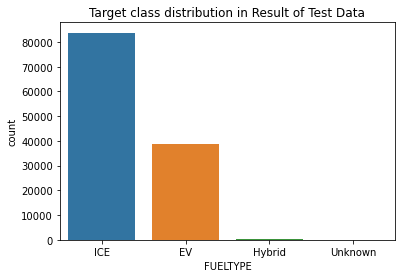

In [38]:
# Plot target class distrbution of the prediction results
ax = plt.axes()
sns.countplot(x='FUELTYPE', data=results, ax=ax);
ax.set_title('Target class distribution in Result of Test Data')
plt.show()

Explanation of result coutplot:
-The 